In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(os.getcwd()+"/Dataset_Clean.csv", index_col="Metrics")
df.columns

Index(['Date', 'Energy', 'Utilities', 'Materials', 'Financials', 'Industrials',
       'Health Care', 'Real Estate', 'Consumer Staples'],
      dtype='object')

In [3]:
sector = 'Energy'

dataset = df[[sector, 'Date']]
pivot_dataset = dataset.reset_index().pivot(index='Metrics', columns='Date')
pivot_dataset = pivot_dataset.dropna()
pivot_dataset = pivot_dataset[sector]
pivot_dataset = pivot_dataset.transpose()

In [4]:
pivot_dataset.tail().round(3)

Metrics,% Change YTD,Assets/Equity,Dividend Payout,Dividend Yield,EBIT Margin,EBITDA Margin,EPS NTMA Growth 1 year,Enterprise Value to EBIT,Enterprise Value to EBITDA,Enterprise Value to Sales,Net Debt/EBITDA,PEG,Price to Book Value,Price to Cash Flow,Price to Earnings,Price to Free Cash Flow,Price to Sales,Return on Equity
Date,,,,,,,,,,,,,,,,,,
31/12/2013,0.025,1.893,31.616,2.431,14.595,20.936,10.301,8.247,5.749,1.204,0.535,1.505,1.871,7.044,13.013,62.000,1.081,14.381
31/12/2014,-0.148,2.043,51.313,3.060,11.444,20.009,-18.591,11.691,6.686,1.338,0.909,2.076,1.752,7.384,16.781,87.767,1.151,10.442
31/12/2015,0.273,1.980,98.819,3.690,8.662,19.390,-4.566,17.687,7.902,1.532,1.530,-6.582,1.522,7.972,26.781,61.192,1.236,5.685
31/12/2016,-0.155,2.055,86.538,2.653,8.402,18.822,292.068,21.641,9.549,1.797,1.523,4.375,2.063,10.035,32.613,29.896,1.468,6.365
31/12/2017,-0.165,1.990,74.416,2.918,9.826,19.982,35.724,17.730,8.715,1.741,1.277,1.177,1.977,9.262,25.509,26.804,1.442,7.754


In [5]:
pivot_dataset.describe().round(3)

Metrics,% Change YTD,Assets/Equity,Dividend Payout,Dividend Yield,EBIT Margin,EBITDA Margin,EPS NTMA Growth 1 year,Enterprise Value to EBIT,Enterprise Value to EBITDA,Enterprise Value to Sales,Net Debt/EBITDA,PEG,Price to Book Value,Price to Cash Flow,Price to Earnings,Price to Free Cash Flow,Price to Sales,Return on Equity
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,0.041,1.933,47.247,2.663,12.361,19.836,35.077,11.091,6.269,1.239,0.738,1.012,1.771,7.253,16.945,40.705,1.083,12.268
std,0.163,0.084,28.854,0.458,2.581,0.586,93.359,5.787,1.845,0.345,0.525,2.859,0.175,1.440,8.265,21.868,0.236,4.292
min,-0.165,1.831,22.066,2.133,8.402,18.822,-31.612,6.076,4.500,0.923,0.272,-6.582,1.522,5.904,9.835,22.029,0.854,5.685
25%,-0.109,1.857,26.407,2.395,10.230,19.584,-3.241,6.756,4.781,0.947,0.309,1.197,1.623,6.075,10.927,27.477,0.876,8.426
50%,0.044,1.927,30.032,2.559,13.407,19.757,6.942,7.837,5.491,1.114,0.475,1.378,1.777,6.854,12.545,30.192,1.022,14.735
75%,0.147,1.987,68.640,2.852,14.397,20.002,30.040,16.188,7.598,1.484,1.185,1.933,1.863,7.825,23.327,54.163,1.215,15.196
max,0.273,2.055,98.819,3.690,15.194,20.936,292.068,21.641,9.549,1.797,1.530,4.375,2.063,10.035,32.613,87.767,1.468,17.276


<Axes: xlabel='Metrics', ylabel='Metrics'>

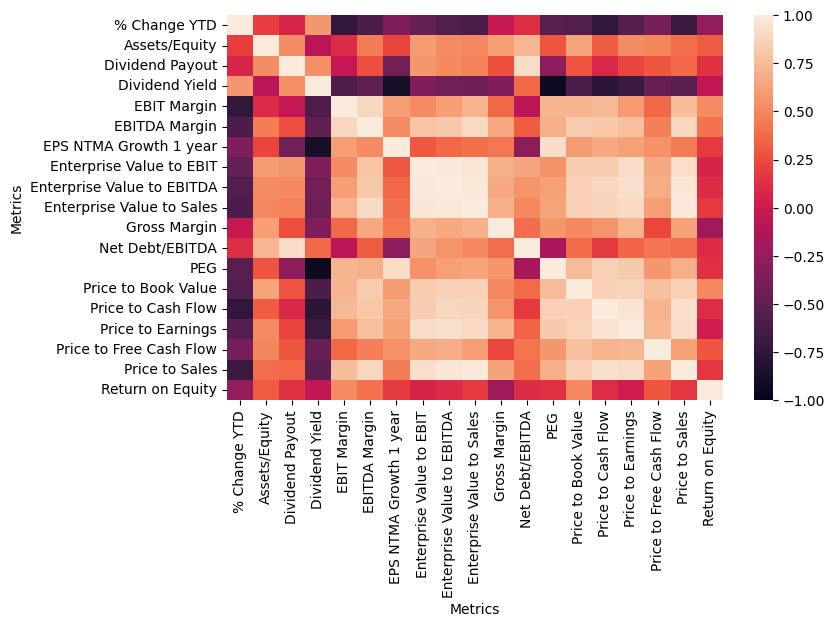

In [10]:
plt.gcf().set_size_inches(8, 5)
sns.heatmap(pivot_dataset.corr(), vmin=-1, vmax=1, annot=False)

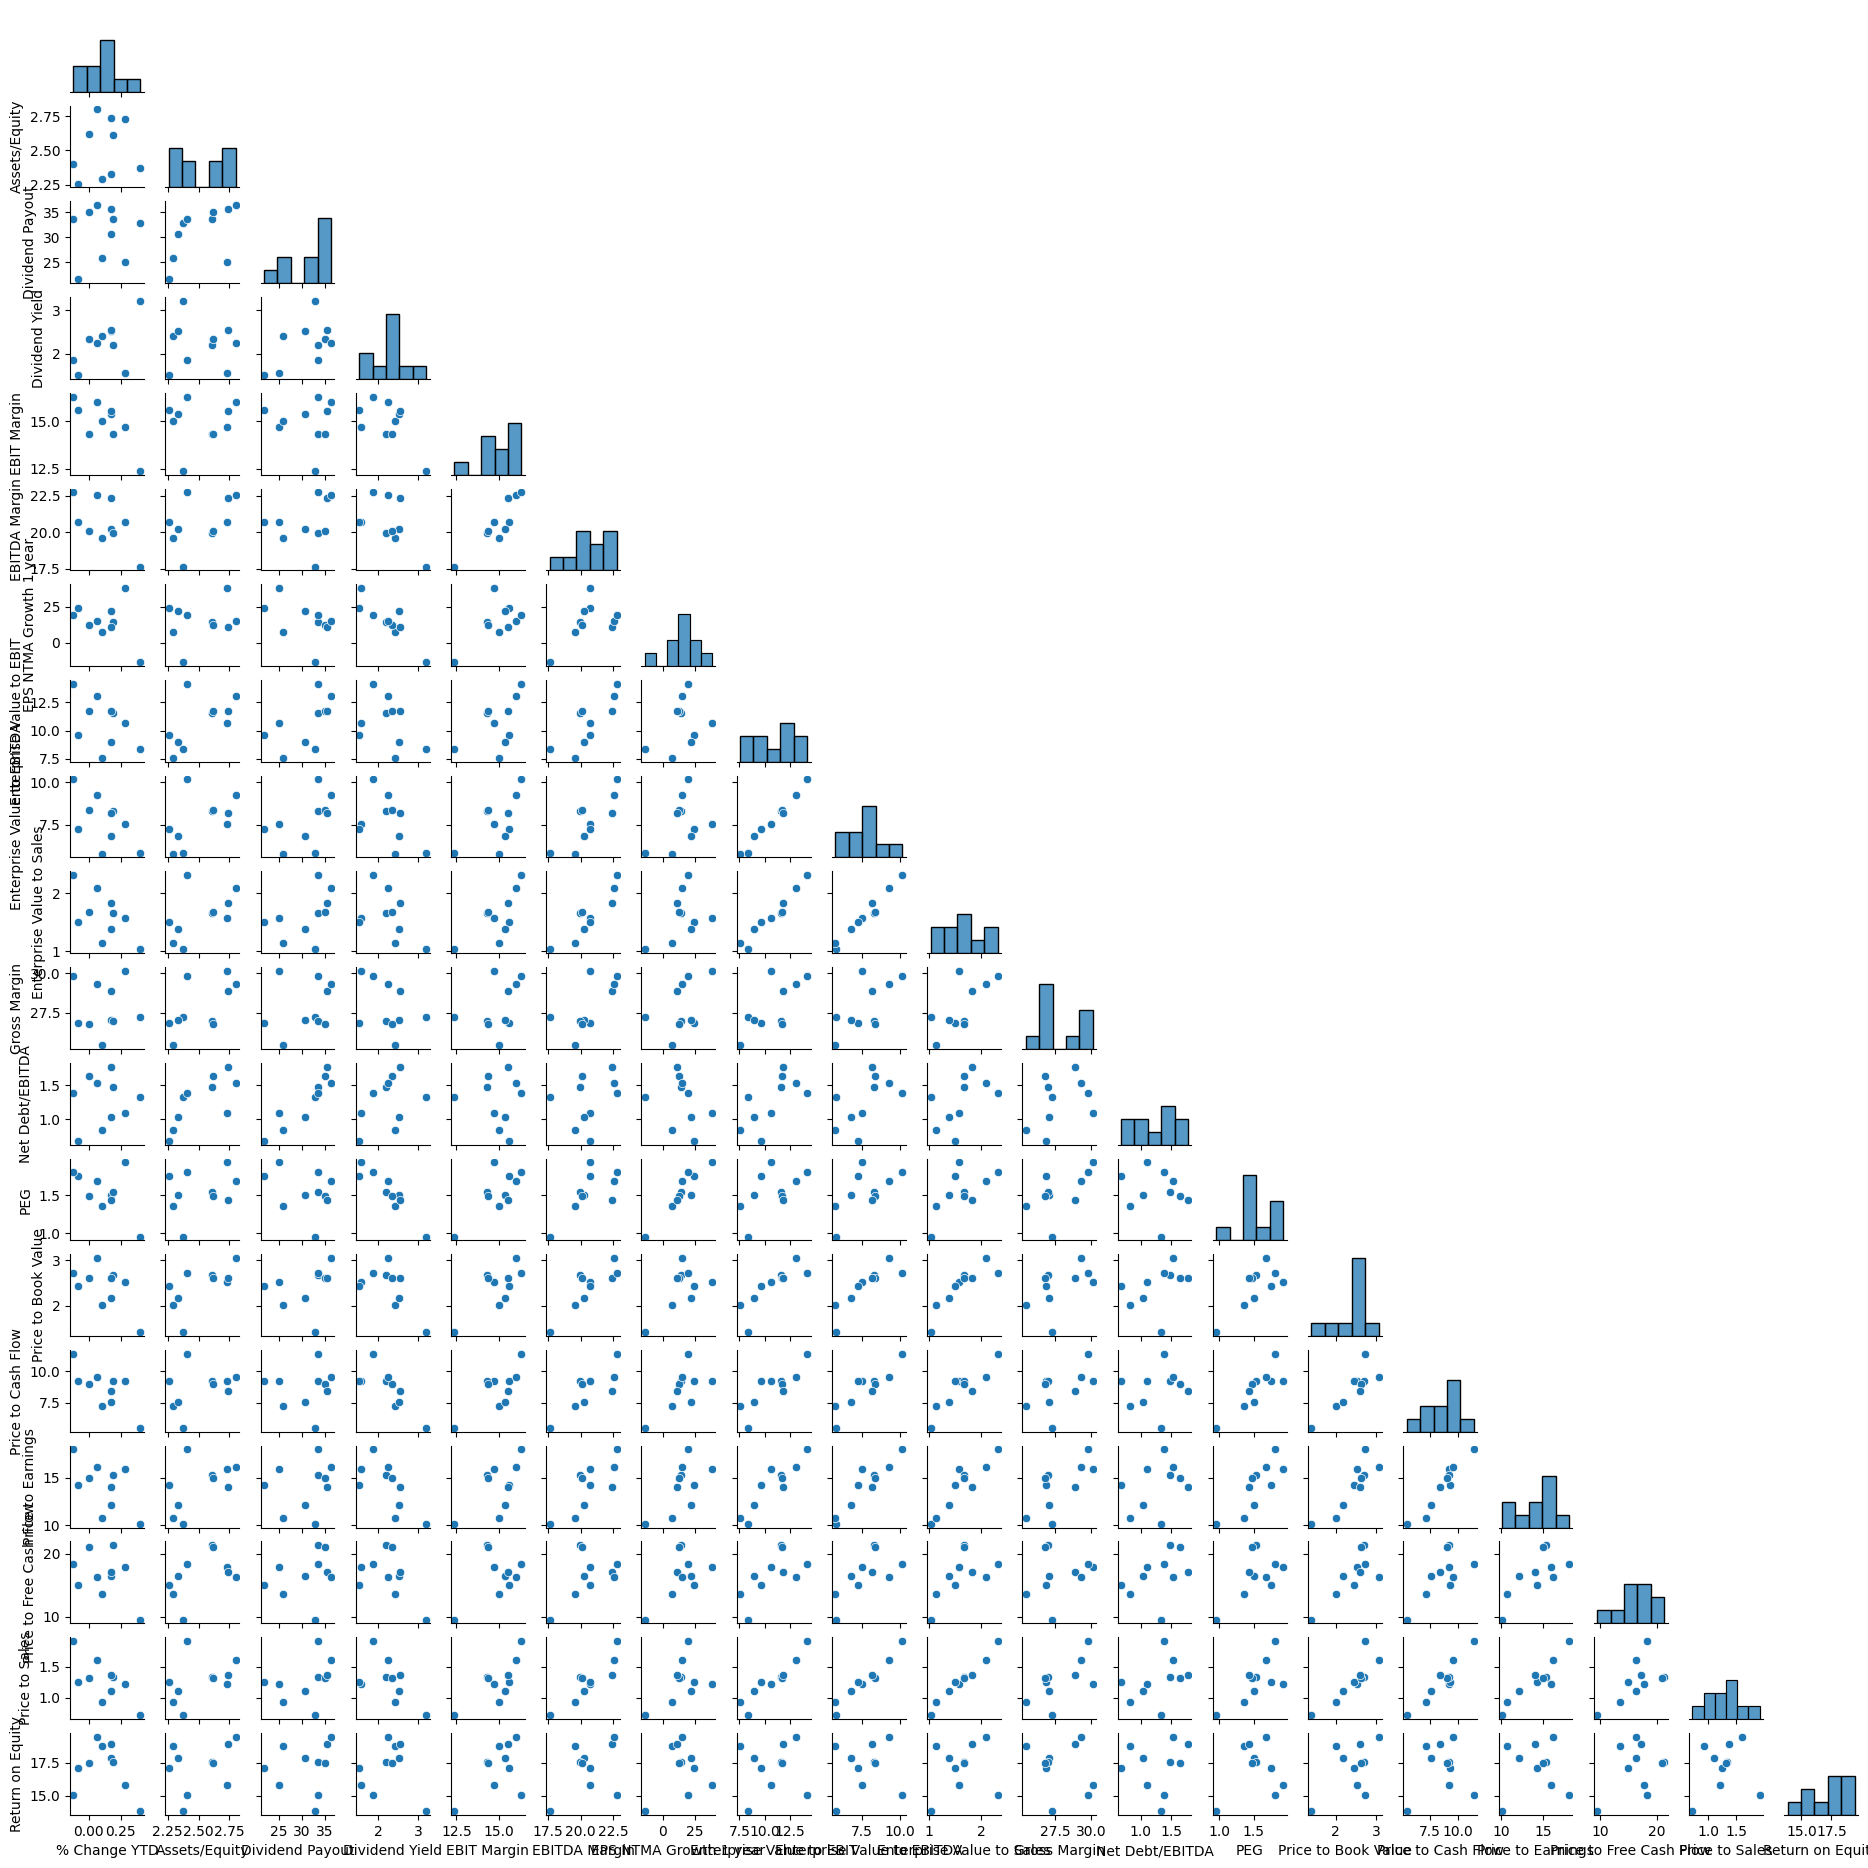

In [11]:
sns.pairplot(pivot_dataset, height=1, corner=True)

In [6]:
y = pivot_dataset['% Change YTD']
X = pivot_dataset.drop(y.name, axis=1)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

reg = LinearRegression().fit(scaled_X, y)

In [7]:
reg.score(scaled_X, y)

1.0

In [8]:
pd.Series(
    reg.coef_,
    index=X.columns
).sort_values()

Metrics
Return on Equity             -0.351860
Enterprise Value to EBIT     -0.304318
Net Debt/EBITDA              -0.292007
PEG                          -0.185313
Dividend Payout              -0.163887
Price to Earnings            -0.149741
Price to Book Value          -0.099737
EBITDA Margin                -0.093148
Price to Free Cash Flow      -0.054078
Assets/Equity                -0.032493
Enterprise Value to EBITDA   -0.029341
Enterprise Value to Sales     0.028307
Price to Cash Flow            0.155828
Dividend Yield                0.255256
EPS NTMA Growth 1 year        0.270697
EBIT Margin                   0.297669
Price to Sales                0.302752
dtype: float64